# Effect of Number of Children and Gender on Adult Student's Academic Interests and Performance

## Project Description
<br>The project uses survey data on adult students at Robert Kennedy College (Switzerland) to test
<br>whether the number of children and students' gender affect their academic perfomance.
<br>It also tests gender based hypotheses about students' interest on data-related fields.
<br>
<br>**Techniques used:**
<br>Data Cleaning, Descriptive Statistics, T-Tests, 
<br>Randomization Tests, Chi-Squared Tests, 
<br>Comparison of Frequency Distributions, Matplotlib Data Visualization

## Environment Setup

### Imports

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats
import seaborn as sns
import openpyxl
import pycountry
%matplotlib inline

## Data Profiling

### Open and View the File

In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
file = pd.read_csv(r"data/dataanalytics-class-data.csv")
file.head()

,ID,Start time,Completion time,Email,Gender,Age,Closest biggest city near you,Number of kids (<18y) living with you,Birth Year,Number of modules completed so far,Average mark so far,Prediction for this module's mark,I enjoy working with data,I am excited about working with data,I am afraid of working with data,I am interested in understanding Data Analytics,I plan to work hard in this module,"Height (absolute value, in centimeters (cm) - sorry imperial system users!)",Height (relative)
0,2,12/17/20 9:09:33,12/17/20 9:10:55,anonymous,Woman,40-49,Lagos,0,1975,5,62.0,62,Agree,Agree,Completely Disagree,Agree,Agree,175.0,very tall
1,3,12/17/20 9:09:27,12/17/20 9:11:01,anonymous,Man,30-39,Dhaka,0,1011986,5,57.0,65,Agree,Agree,Completely Disagree,Agree,Agree,172.0,average
2,4,12/17/20 9:09:34,12/17/20 9:14:39,anonymous,Man,30-39,Hanoi,0,1989,5,61.0,64,Agree,Meh,Disagree,Meh,Meh,178.0,average
3,5,12/17/20 9:19:54,12/17/20 9:27:03,anonymous,Woman,50-59,Stockholm,0,1970,5,60.0,100,Agree,Agree,Completely Disagree,Agree,Completely Agree,164.0,average
4,6,12/17/20 9:28:13,12/17/20 9:35:44,anonymous,Man,40-49,Accra,3,1979,5,60.0,70,Completely Agree,Agree,Completely Disagree,Completely Agree,Meh,170.0,average


In [4]:
file.tail()

,ID,Start time,Completion time,Email,Gender,Age,Closest biggest city near you,Number of kids (<18y) living with you,Birth Year,Number of modules completed so far,Average mark so far,Prediction for this module's mark,I enjoy working with data,I am excited about working with data,I am afraid of working with data,I am interested in understanding Data Analytics,I plan to work hard in this module,"Height (absolute value, in centimeters (cm) - sorry imperial system users!)",Height (relative)
104,107,1/9/21 00:54,1/9/21 00:57,anonymous,Man,40-49,Montreal,3,1975,1,78.0,75,Agree,Completely Agree,Completely Disagree,Completely Agree,Completely Agree,184.0,tall
105,108,1/9/21 14:19,1/9/21 14:20,anonymous,Man,50-59,"Zurich, Switzerland",0,1964,5,60.0,75,Agree,Completely Agree,Completely Disagree,Agree,Completely Agree,186.0,tall
106,109,1/11/21 11:47,1/11/21 11:48,anonymous,Woman,40-49,Berlin,1,1978,3,70.0,70,Agree,Agree,Completely Disagree,Completely Agree,Completely Agree,166.0,average
107,110,1/11/21 15:30,1/11/21 15:35,anonymous,Woman,40-49,Lusaka,5,1976,5,56.0,60,Agree,Agree,Disagree,Agree,Agree,160.0,average
108,111,1/12/21 06:12,1/12/21 06:16,anonymous,Woman,40-49,Riyadh,0,1976,5,69.0,71,Agree,Completely Agree,Completely Disagree,Completely Agree,Completely Agree,171.0,tall


In [3]:
file.columns

Index(['ID', 'Start time', 'Completion time', 'Email', 'Gender', 'Age',
       'Closest biggest city near you',
       'Number of kids (<18y) living with you', 'Birth Year',
       'Number of modules completed so far', 'Average mark so far',
       'Prediction for this module's mark', 'I enjoy working with data',
       'I am excited about working with data',
       'I am afraid of working with data',
       'I am interested in understanding Data Analytics',
       'I plan to work hard in this module',
       'Height (absolute value, in centimeters (cm) - sorry imperial system users!)',
       'Height (relative)'],
      dtype='object')

#### Dropping columns with data that is not useful to the analysis

In [4]:
unrelated_columns = ['ID','Email']
file = file.drop(columns=unrelated_columns)
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 17 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   Start time                                                                   109 non-null    object 
 1   Completion time                                                              109 non-null    object 
 2   Gender                                                                       109 non-null    object 
 3   Age                                                                          109 non-null    object 
 4   Closest biggest city near you                                                109 non-null    object 
 5   Number of kids (<18y) living with you                                        109 non-null    int64  
 6   Birth Year                                

#### Renaming all columns to snake case and shorter names 

In [5]:
file = file.rename(columns={"Start time" : "Start_time",
                     "Completion time": "End_time",
                     "Closest biggest city near you": "City",
                     "Number of kids (<18y) living with you": "Kids",
                     "Birth Year": "Birth_year",
                     "Number of modules completed so far": "Modules_num", 
                     "Average mark so far": "Average_grade", 
                     "Prediction for this module's mark": "Prediction_grade",
                     "Height (absolute value, in centimeters (cm) - sorry imperial system users!)" : "Height_cm",
                     "Height (relative)": "Height_relative", 
                     "I enjoy working with data": "Enjoy_data", 
                     "I am excited about working with data": "Excited_data",
                     "I am afraid of working with data": "Afraid_data",
                     "I am interested in understanding Data Analytics": "Interested_DA",
                     "I plan to work hard in this module": "Work_hard",
                    })

#### Grouping columns by quantitative and qualitative

In [ ]:
quantitative_cols = ["Start_time", "End_time", "Age", "Kids", "Modules_num", "Average_grade", "Prediction_grade", "Height_cm", 
                     "Height_relative", "Enjoy_data", "Excited_data", "Afraid_data", "Interested_DA", 
                     "Work_hard"]

qualitative_cols = ["Gender", "City"]

#### Grouping columns by scales of measurement: nominal, ordinal, interval, and ratio

In [ ]:
nominal_cols = ["Gender", "City"]
ordinal_cols = ["Height_relative", "Enjoy_data", "Excited_data", "Afraid_data", "Interested_DA", "Work_hard"]
ratio_cols = ["Height_cm", "Age", "Kids", "Modules_num"]
interval_cols = ["Start_time", "End_time", "Average_grade", "Prediction_grade"]

#### Grouping into discrete and continuous 

In [ ]:
discrete = ["Kids", "Modules_num"]
continuous = ["Height_cm", "Age", "Start_time", "End_time", "Average_grade", "Prediction_grade"]

### Data Quality Assessment

In [268]:
file.dtypes

Start_time           object
End_time             object
Gender               object
Age                  object
City                 object
Kids                  int64
Birth_year            int64
Modules_num          object
Average_grade       float64
Prediction_grade      int64
Enjoy_data           object
Excited_data         object
Afraid_data          object
Interested_DA        object
Work_hard            object
Height_cm           float64
Height_relative      object
dtype: object

In [269]:
file.isnull().sum()

Start_time          0
End_time            0
Gender              0
Age                 0
City                0
Kids                0
Birth_year          0
Modules_num         0
Average_grade       3
Prediction_grade    0
Enjoy_data          0
Excited_data        0
Afraid_data         0
Interested_DA       0
Work_hard           0
Height_cm           0
Height_relative     0
dtype: int64

In [6]:
file.info()
file.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Start_time        109 non-null    object 
 1   End_time          109 non-null    object 
 2   Gender            109 non-null    object 
 3   Age               109 non-null    object 
 4   City              109 non-null    object 
 5   Kids              109 non-null    int64  
 6   Birth_year        109 non-null    int64  
 7   Modules_num       109 non-null    object 
 8   Average_grade     106 non-null    float64
 9   Prediction_grade  109 non-null    int64  
 10  Enjoy_data        109 non-null    object 
 11  Excited_data      109 non-null    object 
 12  Afraid_data       109 non-null    object 
 13  Interested_DA     109 non-null    object 
 14  Work_hard         109 non-null    object 
 15  Height_cm         109 non-null    float64
 16  Height_relative   109 non-null    object 
dt

,Start_time,End_time,Gender,Age,City,Kids,Birth_year,Modules_num,Average_grade,Prediction_grade,Enjoy_data,Excited_data,Afraid_data,Interested_DA,Work_hard,Height_cm,Height_relative
0,12/17/20 9:09:33,12/17/20 9:10:55,Woman,40-49,Lagos,0,1975,5,62.0,62,Agree,Agree,Completely Disagree,Agree,Agree,175.0,very tall
1,12/17/20 9:09:27,12/17/20 9:11:01,Man,30-39,Dhaka,0,1011986,5,57.0,65,Agree,Agree,Completely Disagree,Agree,Agree,172.0,average
2,12/17/20 9:09:34,12/17/20 9:14:39,Man,30-39,Hanoi,0,1989,5,61.0,64,Agree,Meh,Disagree,Meh,Meh,178.0,average
3,12/17/20 9:19:54,12/17/20 9:27:03,Woman,50-59,Stockholm,0,1970,5,60.0,100,Agree,Agree,Completely Disagree,Agree,Completely Agree,164.0,average


## Data Cleansing

### Helper Methods

In [6]:
def clean_birth_year(year_value):
    now = datetime.datetime.now()
    current_year = now.year
    digits_num = int(math.log10(year_value))+1
    year_value = str(year_value)
    if (digits_num > 4):
        year_value = year_value[-4:]
    elif (digits_num < 4):
        year_value = current_year - int(year_value)
    return int(year_value)

def convert_age_to_list_range(age_item):
    if "-" in age_item:
        age_item = age_item.split("-")
        first_num = int(age_item[0])
        second_num = int(age_item[1])
        age_item = [first_num, second_num]
    else:
        age_item = age_item.split("+")
        first_num = int(age_item[0])
        second_num = 100
        age_item = [first_num, second_num]
    return age_item

def correct_cities(city):
    city = city.title()
    city = city.strip()
    return city

### Missing Values

The "Average  mark so far" contains less non-null values than other columns. Checking the NaN values.

In [ ]:
file['Average mark so far']

#### Dropping all the rows with null values

In [7]:
file = file.dropna()
file = file.reset_index(drop=True)
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Start_time        106 non-null    object 
 1   End_time          106 non-null    object 
 2   Gender            106 non-null    object 
 3   Age               106 non-null    object 
 4   City              106 non-null    object 
 5   Kids              106 non-null    int64  
 6   Birth_year        106 non-null    int64  
 7   Modules_num       106 non-null    object 
 8   Average_grade     106 non-null    float64
 9   Prediction_grade  106 non-null    int64  
 10  Enjoy_data        106 non-null    object 
 11  Excited_data      106 non-null    object 
 12  Afraid_data       106 non-null    object 
 13  Interested_DA     106 non-null    object 
 14  Work_hard         106 non-null    object 
 15  Height_cm         106 non-null    float64
 16  Height_relative   106 non-null    object 
dt

#### Exploring the Birth Year and Age

In [ ]:
file[['Birth_year', 'Age']]

Using a helper method clean_birth_year() to clean the years: from a more than 4-digit number takes only last 4 digits, for each 2 digit number subtracts the number from the current year to find the birth year 

In [8]:
file["Birth_year"] = file["Birth_year"].apply(clean_birth_year)

Subtracting from the current year the birth year (to explore if it is in the age range)

In [9]:
ages_calculated_by_birth_year = []
now = datetime.datetime.now()
current_year = now.year
for i in file['Birth_year']:
    age = current_year - i
    ages_calculated_by_birth_year.append(age)

file["Age_by_birth_year"] = ages_calculated_by_birth_year

Converting Age string into a list of 2 values

In [10]:
file["Age"] = file["Age"].apply(convert_age_to_list_range)

Comparing "Age" and "Age_by_birth_year" column values

In [304]:
file[["Age_by_birth_year", "Age"]]

In [11]:
for i in range(0, 106):
    if (file["Age_by_birth_year"].iloc[i] > file["Age"].iloc[i][1]) \
        or (file["Age_by_birth_year"].iloc[i] < file["Age"].iloc[i][0]):
        print("ISSUE")
        print("Age by birth year = ", file["Age_by_birth_year"].iloc[i])
        print("Age Range: ", file["Age"].iloc[i][0], " - ", file["Age"].iloc[i][1])
        
""" The issue results were observed and no significant issues were found, 
    the difference might be in months, or some
    people have put themsleves in 1 year younger group"""
    

ISSUE
Age by birth year =  50
Age Range:  40  -  49
ISSUE
Age by birth year =  50
Age Range:  40  -  49
ISSUE
Age by birth year =  50
Age Range:  40  -  49
ISSUE
Age by birth year =  40
Age Range:  30  -  39
ISSUE
Age by birth year =  62
Age Range:  50  -  59
ISSUE
Age by birth year =  30
Age Range:  20  -  29
ISSUE
Age by birth year =  60
Age Range:  50  -  59
ISSUE
Age by birth year =  30
Age Range:  20  -  29
ISSUE
Age by birth year =  30
Age Range:  20  -  29
ISSUE
Age by birth year =  60
Age Range:  50  -  59
ISSUE
Age by birth year =  50
Age Range:  40  -  49


' The issue results were observed and no significant issues were found, \n    the difference might be in months, or some\n    people have put themsleves in 1 year younger group'

The data exploration above proves that the Age range and Age data can be trusted now


### Errors

In [12]:
file["City"] = file["City"].apply(correct_cities)

### Outliers

##### Displaying the age and grades to find outliers

Text(0.5, 1.0, 'Student Age and Average Grade')

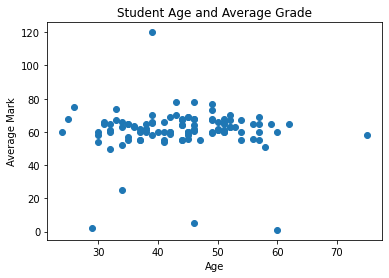

In [12]:
fig, ax = plt.subplots()
ax.scatter(file["Age_by_birth_year"], file["Average_grade"]) 
ax.set_xlabel('Age')
ax.set_ylabel('Average Mark')  
ax.set_title("Student Age and Average Grade")

Conclusions: the grade of 120 is likely to be en error, because the max grade is 100. The grades below 50 shall be examined closer. The grades below 20 should be invetigated since this is a strong failing grade. 

In [13]:
# DROP OUTLIERS
outlier_indexes = []
## study filter() method

for i in range(len(file)):
    if (file["Average_grade"][i] >100) or (file["Average_grade"][i] <=5):
        print(i, " ", file["Average_grade"][i])
        outlier_indexes.append(i)

file = file.drop(outlier_indexes)
file = file.reset_index(drop=True)

56   2.0
79   120.0
88   1.0
95   5.0


Text(0.5, 1.0, 'Student Age and Average Grade')

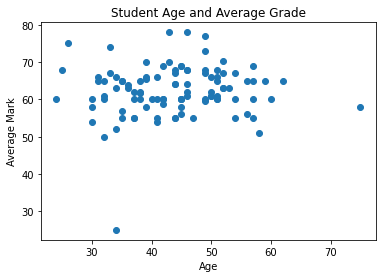

In [50]:
# drawing the plot again with no outliers
fig, ax = plt.subplots()
ax.scatter(file["Age_by_birth_year"], file["Average_grade"]) 
ax.set_xlabel('Age')
ax.set_ylabel('Average Mark')  
ax.set_title("Student Age and Average Grade")

##### Displaying the average grades and the number of completed modules

Text(0.5, 1.0, 'Number of Modules and Average Grade')

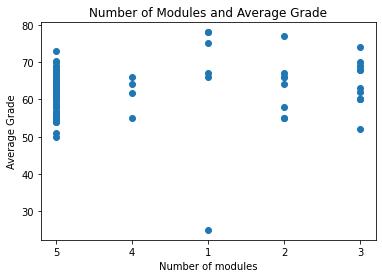

In [52]:
fig, ax = plt.subplots()
# sort number if modules from 1-5
ax.scatter(file["Modules_num"], file["Average_grade"]) 
ax.set_xlabel('Number of modules')
ax.set_ylabel('Average Grade') 
ax.set_title("Number of Modules and Average Grade")

##### Displaying the average grades and the number of kids

Text(0.5, 1.0, 'Number of Kids of a Student and Average Grade')

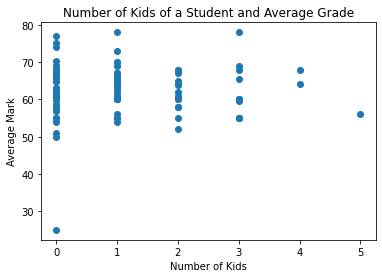

In [53]:
fig, ax = plt.subplots()
ax.scatter(file["Kids"], file["Average_grade"]) 
ax.set_xlabel('Number of Kids')
ax.set_ylabel('Average Mark')  
ax.set_title("Number of Kids of a Student and Average Grade")

### Statistical Summaries

In [65]:
file.describe()

,Kids,Birth_year,Average_grade,Prediction_grade,Height_cm,Age_by_birth_year
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,1.009901,1977.158416,62.739109,66.247525,170.746238,43.841584
std,1.170428,9.099157,5.709389,10.668089,141.340405,9.099157
min,0.000000,1946.000000,50.000000,0.000000,1.400000,24.000000
25%,0.000000,1971.000000,60.000000,60.000000,160.020000,37.000000
50%,1.000000,1977.000000,62.000000,65.000000,170.000000,44.000000
75%,2.000000,1984.000000,66.000000,70.000000,178.000000,50.000000
max,5.000000,1997.000000,78.000000,100.000000,1500.000000,75.000000


In [42]:
file["Enjoy_data"].describe()

count       102
unique        4
top       Agree
freq         54
Name: Enjoy_data, dtype: object

In [255]:
file["Excited_data"].describe()

count       106
unique        5
top       Agree
freq         46
Name: Excited_data, dtype: object

In [256]:
file["Afraid_data"].describe()

count                     106
unique                      5
top       Completely Disagree
freq                       41
Name: Afraid_data, dtype: object

In [257]:
file["Interested_DA"].describe()

count                  106
unique                   4
top       Completely Agree
freq                    60
Name: Interested_DA, dtype: object

In [258]:
file["Work_hard"].describe()

count                  106
unique                   4
top       Completely Agree
freq                    61
Name: Work_hard, dtype: object

In [259]:
file["Gender"].describe()

count     106
unique      2
top       Man
freq       63
Name: Gender, dtype: object

In [260]:
file["Modules_num"].describe()

count     106
unique      5
top         5
freq       74
Name: Modules_num, dtype: object

In [261]:
file["Height_relative"].describe()

count         106
unique          5
top       average
freq           52
Name: Height_relative, dtype: object

#### Pivot Tables
##### Average Grade Stats by Gender

In [55]:
grouped_by_gender = file.groupby("Gender")
values = grouped_by_gender[["Average_grade"]]
gender_stats = values.agg([np.min, np.max, np.mean, np.std, np.median])
gender_stats
# draw box plot !!!

Average_grade                                  
                amin  amax       mean       std median
Gender                                                
Man             25.0  78.0  62.402667  7.642998   62.5
Woman           50.0  75.0  62.321190  5.462325   62.0

##### Effect of Number of Kids on Average Grade

In [56]:
# create a method that groups by and counts agg stats
grouped_by_kids = file.groupby("Kids")
values = grouped_by_kids[["Average_grade"]]
kids_stats = values.agg([np.min, np.max, np.mean, np.std, np.median])
kids_stats
# try without dropping min values for grades 
#draw box plots

Average_grade                                   
              amin  amax       mean       std  median
Kids                                                 
0             25.0  77.0  61.776957  7.987933  61.875
1             54.0  78.0  63.752857  5.532400  63.625
2             52.0  68.0  61.559286  4.808884  61.500
3             55.0  78.0  62.272727  7.195011  60.000
4             64.0  68.0  66.000000  2.828427  66.000
5             56.0  56.0  56.000000       NaN  56.000

In [75]:
grouped_by_excited = file.groupby("Excited_data")
values = grouped_by_excited[["Average_grade"]]
excited_stats = values.agg([np.min, np.max, np.mean, np.std])
excited_stats

Average_grade                            
                             amin   amax       mean       std
Excited_data                                                 
Agree                        50.0  70.00  61.166444  4.953781
Completely Agree             55.0  78.00  65.134706  6.439260
Completely Disagree          66.0  66.00  66.000000       NaN
Disagree                     60.0  68.00  64.000000  5.656854
Meh                          52.0  70.33  61.872632  4.972944

In [76]:
grouped_by_interested = file.groupby("Interested_DA")
values = grouped_by_interested[["Average_grade"]]
interested_stats = values.agg([np.min, np.max, np.mean, np.std])
interested_stats

Average_grade                            
                          amin   amax       mean       std
Interested_DA                                             
Agree                     50.0  70.33  61.504211  4.879403
Completely Agree          54.0  78.00  63.845273  6.038998
Disagree                  66.0  66.00  66.000000       NaN
Meh                       51.0  68.00  60.285714  6.210590

#### Average vs Prediction Grade

Text(0.5, 1.0, 'Average vs Prediction Grade')

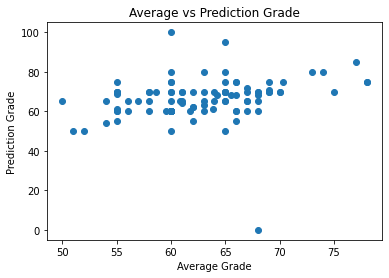

In [80]:
## check if the labels are correct
fig, ax = plt.subplots()
ax.scatter(file["Average_grade"], file["Prediction_grade"]) 
ax.set_xlabel('Average Grade')
ax.set_ylabel('Prediction Grade') 
ax.set_title("Average vs Prediction Grade")

#### Frequency Distributions

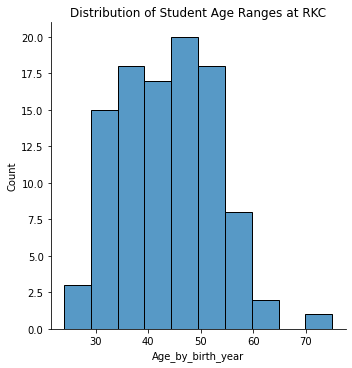

In [55]:
# change to use distr plot

sns.displot(file["Age_by_birth_year"]).set(title="Distribution of Student Age Ranges at RKC")


Text(0, 0.5, '')

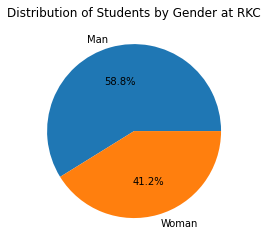

In [56]:
file["Gender"].value_counts().plot.pie(rot=0, 
                                       title="Distribution of Students by Gender at RKC", 
                                       autopct = '%.1f%%')
plt.ylabel('')

Separating the grades according to grading scales and creating freq distr for grades

Grades are difficult to visualize just by their unique value counts, therefore, the grades are grouped into ranges and then the frequency of grades in each range is calculated. The table of frequencies of ranges is visualized

In [44]:
intervals = pd.interval_range(start = 0, end = 100, freq = 10)
grade_freq = pd.Series([0,0,0,0,0,0,0,0,0,0], index = intervals)

for value in file["Average_grade"]:
    for i in intervals:
        if value in i:
            grade_freq.loc[i] +=1
            break
            
grade_freq 


(0, 10]       0
(10, 20]      0
(20, 30]      1
(30, 40]      0
(40, 50]      1
(50, 60]     40
(60, 70]     53
(70, 80]      7
(80, 90]      0
(90, 100]     0
dtype: int64

In [45]:
grade_freq_df = pd.DataFrame([grade_freq.values], columns=["0-10", "11-20", "21-30", 
                                                       "31-40", "41-50", "51-60", "61-70", "71-80", "81-90", "91-100"])
grade_freq_df

,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100
0,0,0,1,0,1,40,53,7,0,0


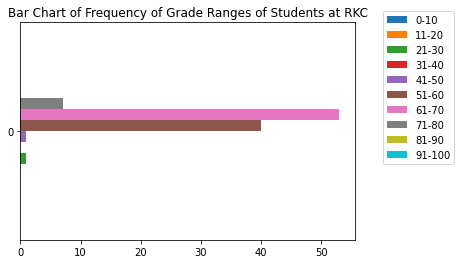

In [48]:
grade_freq_df.plot.barh(title="Bar Chart of Frequency of Grade Ranges of Students at RKC")
plt.legend(loc='center', bbox_to_anchor=(1.19, 0.7))
# Improve graph

Another was of visualizing the grade ranges could be a Histogram, 
it is quicker to create, since it does not need a frequency table,
and the ranges can be assigned automatically by using "bins"

<AxesSubplot:title={'center':'Histogram of Frequency of Grade Ranges of Students at RKC'}, ylabel='Frequency'>

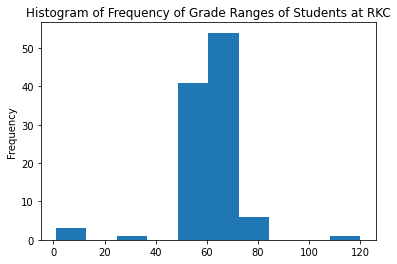

In [144]:
file["Average_grade"].plot.hist(bins=10, title = "Histogram of Frequency of Grade Ranges of Students at RKC")

#### Frequency Distribution of Ages

In [145]:
intervals = pd.interval_range(start = 25, end = 100, freq = 10)
age_freq = pd.Series([0,0,0,0,0,0,0], index = intervals)

for value in file["Age_by_birth_year"]:
    for i in intervals:
        if value in i:
            age_freq.loc[i] +=1
            break
            
age_freq 

(25, 35]    21
(35, 45]    39
(45, 55]    32
(55, 65]    11
(65, 75]     1
(75, 85]     0
(85, 95]     0
dtype: int64

In [128]:
## ( indicates non inclusive value, ] indicates inclusive, therefore, the names of the range start from 36, 46 and etc
age_freq_df = pd.DataFrame([age_freq.values], columns=["25-35", "36-45", "46-55", 
                                                       "56-65", "66-75", "76-85", "86-95"])
age_freq_df

,25-35,36-45,46-55,56-65,66-75,76-85,86-95
0,21,39,32,11,1,0,0


<AxesSubplot:title={'center':'Frequency of Age Ranges of Students at RKC'}>

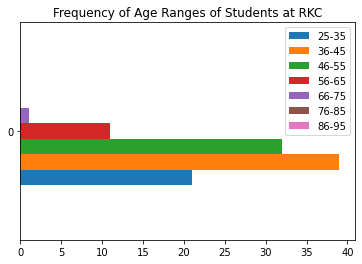

In [130]:
age_freq_df.plot.barh(title="Frequency of Age Ranges of Students at RKC")

The Histogram Visualization of Age Ranges:

<AxesSubplot:title={'center':'Histogram of Frequency of Age Ranges of Students at RKC'}, ylabel='Frequency'>

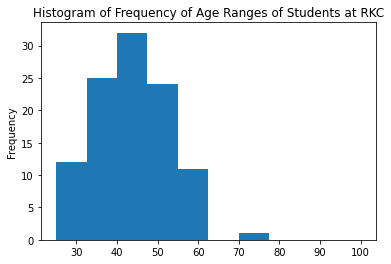

In [146]:
file["Age_by_birth_year"].plot.hist(range=(25,100),bins=10, title = 
                                    "Histogram of Frequency of Age Ranges of Students at RKC")

This can be considered as a Normal Distribution. 

#### Frequency Distrbibution of Heights

In [197]:
intervals = pd.interval_range(start = 120, end = 210, freq = 10)
height_freq = pd.Series([0,0,0,0,0,0,0,0,0], index = intervals)

for value in file["Height_cm"]:
    for i in intervals:
        if value in i:
            height_freq.loc[i] +=1
            break
            
height_freq

(120, 130]     0
(130, 140]     1
(140, 150]     0
(150, 160]    16
(160, 170]    29
(170, 180]    29
(180, 190]    19
(190, 200]     1
(200, 210]     0
dtype: int64

In [198]:
height_freq_df = pd.DataFrame([height_freq.values], columns=["120-130", "131-140",
                                                       "141-150", "151-160", "161-170", "171-180", 
                                                       "181-190", "191-200", "201-210"])
height_freq_df

,120-130,131-140,141-150,151-160,161-170,171-180,181-190,191-200,201-210
0,0,1,0,16,29,29,19,1,0


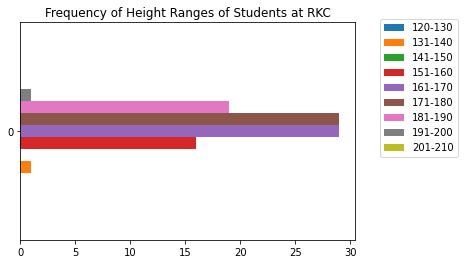

In [231]:
height_freq_df.plot.barh(title = "Frequency of Height Ranges of Students at RKC")
plt.legend(loc='center', bbox_to_anchor=(1.19, 0.7))


Histogram visualization of height ranges:

<AxesSubplot:title={'center':'Histogram of Frequency of Height Ranges of Students at RKC'}, ylabel='Frequency'>

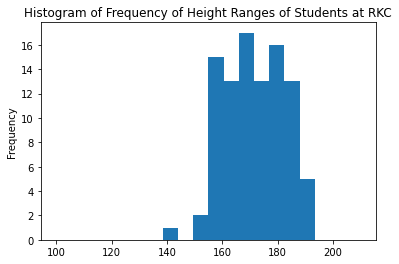

In [149]:
file["Height_cm"].plot.hist(range=(100,210),bins=20, title = 
                                    "Histogram of Frequency of Height Ranges of Students at RKC")

This can be considered as a Uniform Distribution.

#### Frequency Distrbibution by Gender to understand the Diversity of Students at RKC
No ranges were created for this column because it contains only 2 nominal variables and 
it is easy to understand by simple count of unique values per each nominal variable 

#### Frequency Distrbibution by Number of Kids of Students at RKC
No ranges were created for this column because it contains only few variables and 
it is easy to understand by simple count of unique values variable 

<AxesSubplot:title={'center':'Distribution of Students by Amount of Kids at RKC'}>

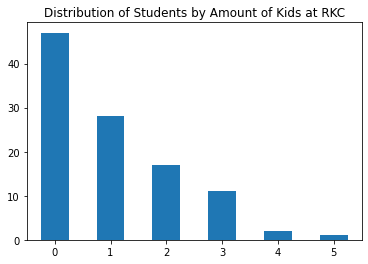

In [126]:
file["Kids"].value_counts().plot.bar(rot=0, title="Distribution of Students by Amount of Kids at RKC")

Histogram view:

<AxesSubplot:title={'center':'Histogram of Distribution of Students by Amount of Kids at RKC'}, ylabel='Frequency'>

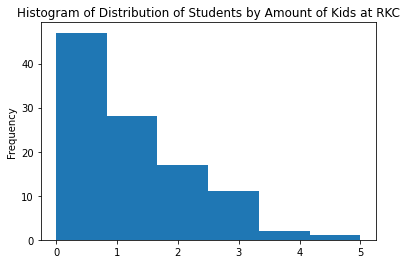

In [150]:
file["Kids"].plot.hist(range=(0,5),bins=6, title = 
                                    "Histogram of Distribution of Students by Amount of Kids at RKC")

This can be considered as a Positive Distribution (Right Skewed)

#### Exploring the columns "Enjoy_data", "Excited_data", "Afraid_data", "Interested_DA" to visualize the interest of students in Data Analytics

In [160]:
file["Enjoy_data"].value_counts()

Agree               56
Completely Agree    38
Meh                 10
Disagree             2
Name: Enjoy_data, dtype: int64

In [161]:
enj_d_list = list(file["Enjoy_data"].value_counts())

In [162]:
# creating a df for storing the frequencies
enjoy_data_freq_df = pd.DataFrame([enj_d_list], columns=["Agree", "Completely Agree", "Meh", "Disagree"])
enjoy_data_freq_df

,Agree,Completely Agree,Meh,Disagree
0,56,38,10,2


<AxesSubplot:title={'center':'Distribution of Students who Enjoy Data'}>

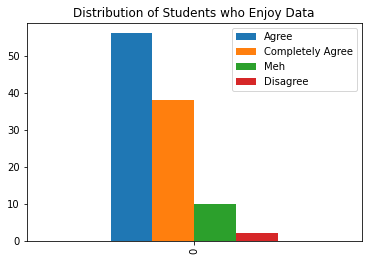

In [174]:
enjoy_data_freq_df.plot.bar(title = "Distribution of Students who Enjoy Data")

#file["Enjoy_data"].value_counts().plot.bar() #this graph was created to compare which one is nicer

In [175]:
file["Excited_data"].value_counts()

Agree                  46
Completely Agree       38
Meh                    19
Disagree                2
Completely Disagree     1
Name: Excited_data, dtype: int64

In [178]:
exc_d_list = list(file["Excited_data"].value_counts())
exc_data_freq_df = pd.DataFrame([exc_d_list], columns=["Agree", "Completely Agree", "Meh", 
                                                       "Disagree", "Completely Disagree"])
exc_data_freq_df

,Agree,Completely Agree,Meh,Disagree,Completely Disagree
0,46,38,19,2,1


<AxesSubplot:title={'center':'Distribution of Students who is Excited about Data'}>

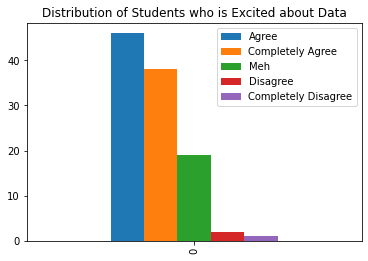

In [179]:
exc_data_freq_df.plot.bar(title = "Distribution of Students who is Excited about Data")

In [180]:
file["Interested_DA"].value_counts()

Completely Agree    60
Agree               38
Meh                  7
Disagree             1
Name: Interested_DA, dtype: int64

In [184]:
inter_d_list = list(file["Interested_DA"].value_counts())
inter_data_freq_df = pd.DataFrame([inter_d_list], columns=["Completely Agree", "Agree", "Meh", 
                                                       "Disagree"])
inter_data_freq_df

,Completely Agree,Agree,Meh,Disagree
0,60,38,7,1


<AxesSubplot:title={'center':'Distribution of Students who is Interested in Data Analytics'}>

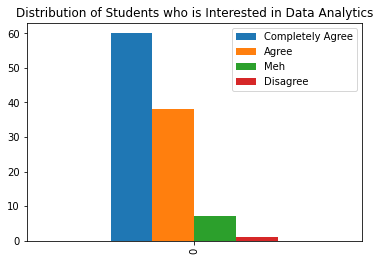

In [186]:
inter_data_freq_df.plot.bar(title = "Distribution of Students who is Interested in Data Analytics")

In [188]:
file["Afraid_data"].value_counts()

Completely Disagree    41
Disagree               40
Meh                    13
Agree                   8
Completely Agree        4
Name: Afraid_data, dtype: int64

In [189]:
afraid_d_list = list(file["Afraid_data"].value_counts())
afraid_data_freq_df = pd.DataFrame([afraid_d_list], columns=["Completely Disagree", "Disagree", "Meh", "Agree", 
                                                       "Completely Agree"])
afraid_data_freq_df

,Completely Disagree,Disagree,Meh,Agree,Completely Agree
0,41,40,13,8,4


<AxesSubplot:title={'center':'Distribution of Students who is Afraid of Working with Data'}>

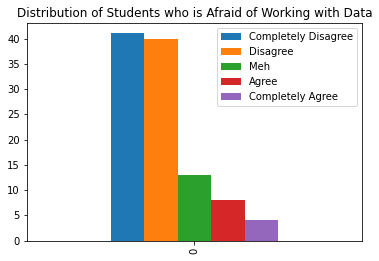

In [190]:
afraid_data_freq_df.plot.bar(title = "Distribution of Students who is Afraid of Working with Data")

Conclusions: the majority of students at RKC enjoy and like working with data and are interested to learn about Data Analytics. 
    The majority of students are not afraid of data.

In [ ]:
### IDEA: Gender Analysis (stats, graphs, chi test)

### IDEA: AGE ANalysis (Hypothesis: the older the person, the more he dislikes Data, and the rgades are worse)

### IDEA: KIDS Analysis (Hypothesis: )

## Hypothesis Testing

### Permutation Tests

- **Null Hypothesis: Elder females with kids and younger males with no kids perform equally good at academia**
- **Hypothesis: Elder females with kids perform academically better than younger males with no kids**

1. we aggregate the data and find the mean per each group
2. calculate the mean difference

In [41]:
elder_female_with_kids = file[(file["Age_by_birth_year"]>40) & (file["Kids"]>0) & (file["Gender"]=="Woman")]
elder_female_with_kids_average_grade = elder_female_with_kids["Average_grade"].mean()

younger_male_no_kids = file[(file["Kids"]==0) & (file["Age_by_birth_year"] <= 40)& (file["Gender"]=="Man")]
younger_male_no_kids_average_grade = younger_male_no_kids["Average_grade"].mean()

mean_difference = elder_female_with_kids_average_grade - younger_male_no_kids_average_grade
print("Elder women with kids: ",elder_female_with_kids_average_grade, 
      "\nYounger men no kids: ", younger_male_no_kids_average_grade,
     "\nDifference: ", mean_difference)


Elder women with kids:  63.59294117647058 
Younger men no kids:  59.76923076923077 
Difference:  3.8237104072398154


3. we get the list of all grade values
4. randomly assign these values either to male or to female group
5. conduct the random assignment repeteadly 1000 times (simulating a new study)
6. calculate the mean differences on each iteration and append to a separate list
6. create a dictionary of frequencies of each possible mean difference value

In [42]:
iter_mean_differences = []
group_a_values = elder_female_with_kids["Average_grade"].tolist()
group_b_values = younger_male_no_kids["Average_grade"].tolist()
all_grades = group_a_values + group_b_values

for i in range(1000):
    males = []
    females = []
    for grade in all_grades:
        random_value = np.random.rand()
        if(random_value >= 0.5):
            males.append(grade)
        else:
            females.append(grade)
    iteration_mean_difference = np.mean(females) - np.mean(males)
    iter_mean_differences.append(iteration_mean_difference)

sampling_distribution = {}

for iter_mean_difference in iter_mean_differences:
    if(sampling_distribution.get(iter_mean_difference, False)):
        val = sampling_distribution.get(iter_mean_difference)
        val = val+1
        sampling_distribution[iter_mean_difference] = val
    else:
        sampling_distribution[iter_mean_difference] = 1

8. determine if the mean difference was random or not
- we set a p value threshold of 0.05 (5%)
- we find the frequency of a mean diffirence equal or higher than the mean dif observed in our dataset
- we divide the amount of such mean diffirences by the number of simulated random datasets

In [43]:
frequencies = []
for key in sampling_distribution.keys():
    if key >= mean_difference:
        frequencies.append(key)
frequencies
sum_freq = len(frequencies)
p_value = sum_freq/1000
p_value

0.121

#### **Conclusion:**
**The p value is 0.117, which is higher than the threshold of 0.05, therefore, we cocnlude that the difference in the means of grades of females and males is purely random.**

### Student T Tests


In [19]:
## testing the same null and alternative hypotheses
elder_female_with_kids = file[(file["Age_by_birth_year"]>40) & (file["Kids"]>0) & (file["Gender"]=="Woman")]
elder_female_with_kids_average_grade = elder_female_with_kids["Average_grade"].mean()

younger_male_no_kids = file[(file["Kids"]==0) & (file["Age_by_birth_year"] <= 40)& (file["Gender"]=="Man")]
younger_male_no_kids_average_grade = younger_male_no_kids["Average_grade"].mean()

mean_difference = elder_female_with_kids_average_grade - younger_male_no_kids_average_grade
print("Elder women with kids: ",elder_female_with_kids_average_grade, 
      "\nYounger men no kids: ", younger_male_no_kids_average_grade,
     "\nDifference: ", mean_difference)

Elder women with kids:  63.59294117647058 
Younger men no kids:  59.76923076923077 
Difference:  3.8237104072398154


#### 1. finding the signal - difference between the mean

In [20]:
signal = mean_difference
signal

3.8237104072398154

#### 2. finding the group variability

In [26]:
variance_group_a = elder_female_with_kids["Average_grade"].var()
variance_group_b = younger_male_no_kids["Average_grade"].var()

print("Variance of Group A (elder females with kids): ", variance_group_a)
print("Variance of Group B (younger males with no kids): ", variance_group_b)

Variance of Group A (elder females with kids):  21.830909558823528
Variance of Group B (younger males with no kids):  133.85897435897434


In [31]:
num_group_a = elder_female_with_kids["Average_grade"].count()
num_group_b = younger_male_no_kids["Average_grade"].count()

print("Number of samples in Group A (elder females with kids): ", num_group_a)
print("Number of samples in Group B (younger males with no kids): ", num_group_b)

Number of samples in Group A (elder females with kids):  17
Number of samples in Group B (younger males with no kids):  13


#### 3. finding the t-value

In [33]:
t_value = signal / math.sqrt((variance_group_a/num_group_a) + (variance_group_b/num_group_b))
print("T-value is ", t_value)

T-value is  1.123599855845671


#### 4. finding the degree of freedom

In [34]:
degree_free = num_group_a + num_group_b - 2
degree_free

28

#### 5. finding the critical value

In [39]:
critical_value = scipy.stats.t.ppf(q=1-.05/2,df=28)
critical_value

2.048407141795244

#### 6. comparing the t-value and the critical value

In [40]:
result = max(t_value, critical_value)
result

2.048407141795244

#### **Conclusion:**
**The t-value is less than the critical value, therefore, the null hypothesis can not be rejected.**

### Chi Squared Tests on Categorical Data
- **Null Hypothesis: Men under 40 and females over 40 and with kids are equally excited to work with data**
- **Hypothesis: Men under 40 are more excited to work with data than females over 40 and with kids**

In [47]:
file.columns


Index(['Start_time', 'End_time', 'Gender', 'Age', 'City', 'Kids', 'Birth_year',
       'Modules_num', 'Average_grade', 'Prediction_grade', 'Enjoy_data',
       'Excited_data', 'Afraid_data', 'Interested_DA', 'Work_hard',
       'Height_cm', 'Height_relative', 'Age_by_birth_year'],
      dtype='object')

In [55]:
interested_data = {}

females = file[file["Gender"]=="Woman"]
females = females.drop(columns = ['Start_time', 'End_time', 'Gender', 'Age', 'City', 'Kids', 'Birth_year',
       'Modules_num', 'Average_grade', 'Prediction_grade', 'Work_hard',
       'Height_cm', 'Height_relative', 'Age_by_birth_year'])

females["Interested_DA_Bool"] = 

,Enjoy_data,Excited_data,Afraid_data,Interested_DA
0,Agree,Agree,Completely Disagree,Agree
3,Agree,Agree,Completely Disagree,Agree
5,Completely Agree,Completely Agree,Completely Disagree,Completely Agree
8,Completely Agree,Agree,Completely Disagree,Completely Agree
9,Agree,Agree,Disagree,Agree
15,Meh,Meh,Meh,Agree
19,Meh,Meh,Disagree,Meh
22,Agree,Completely Agree,Disagree,Completely Agree
24,Agree,Agree,Completely Disagree,Completely Agree
25,Completely Agree,Completely Agree,Disagree,Completely Agree


In [ ]:
## check only for Completely Agree in the Excited data 